## Simulator Test Notebook

Use this notebook to test your simulator code during development.

However, we encourage you to spend some thought on designing good test cases, as it will help
you in developing robust code and avoiding tedious debugging sessions.
For some inspiration on this topic you may want to check out for example
https://en.wikipedia.org/wiki/Test-driven_development
and/or the references therein.

It is recommended to use one notebook cell per test case.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt
from skimage.io import imshow
import random
import numpy as np


from pipelines import PROJECT_PATH,simulate_road_img
from utils.experiment import read_config
from tests import sim_test

### Test constant color function

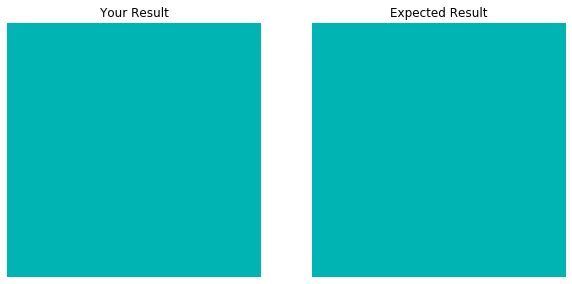

In [3]:
config_path = os.path.join(sim_test.CONFIG_FOLDER,'test_color_constant.json')

params=read_config(config_path)

sim_test.test_color(params,"constant")

### Test noisy color function

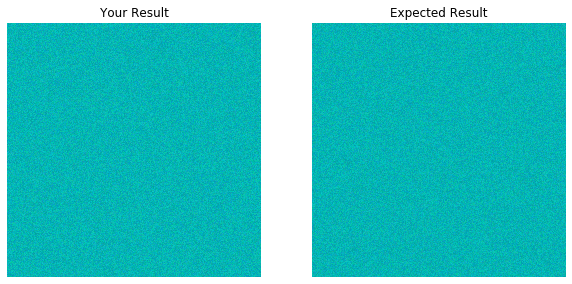

In [4]:
config_path = os.path.join(sim_test.CONFIG_FOLDER,'test_color_noisy.json')

params=read_config(config_path)

sim_test.test_color(params,"noisy")

### Test homography transform

In [5]:
config_path = os.path.join(sim_test.CONFIG_FOLDER,'test_layer_straight_road.json')

params=read_config(config_path)

sim_test.test_homography(params)

Homography Test: PASS


### Test RoadLayer class

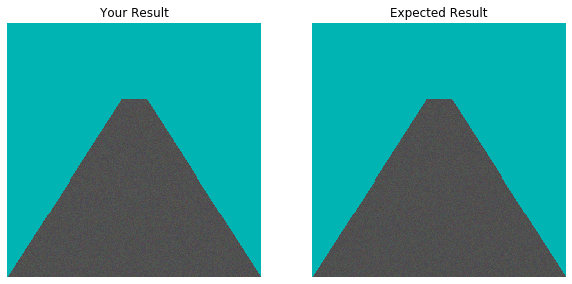

In [6]:
config_path = os.path.join(sim_test.CONFIG_FOLDER,'test_layer_straight_road.json')

params=read_config(config_path)

sim_test.test_road(params,"road")

### Test LaneLayer class

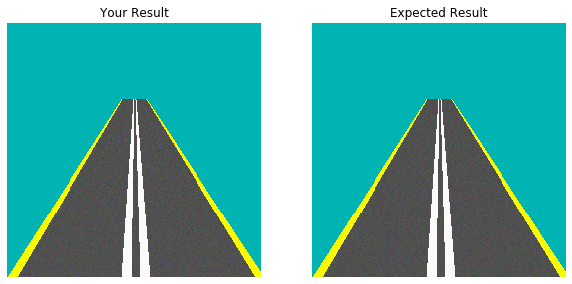

In [7]:
config_path = os.path.join(sim_test.CONFIG_FOLDER,'test_layer_lanes.json')

params=read_config(config_path)

sim_test.test_road(params,"lanes")

### Test image file extension
Test if the get_image_list returns all images in the path 'data/input_data/Real_Lane_Predict' irrespective
of the capitalization of the file extensions. 

In [8]:
sim_test.test_image_types()

Testing correct files
PASS: .jpg image listed
PASS: .png image listed
PASS: .JPG image listed
PASS: .Png image listed
PASS: .jpeg image listed
PASS: .PNG image listed
PASS: .JPEG image listed
PASS: .Jpg image listed

Testing incorrect files
PASS: .json image not listed
PASS: .h5 image not listed


### Test SkyLayer class

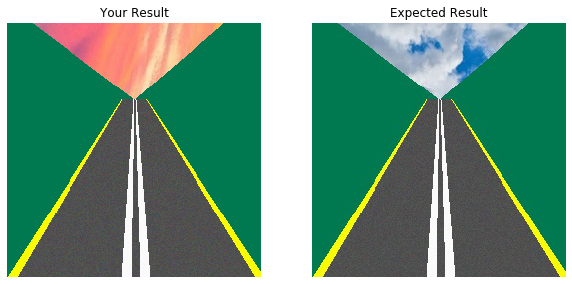

In [9]:
# Since we use random functions in this step, we will set seed to a constant
# value so that we get deterministic results which we can use to compare.

random.seed(2)
np.random.seed(4)


config_path = os.path.join(sim_test.CONFIG_FOLDER,'test_layer_sky.json')

params=read_config(config_path)

sim_test.test_road(params,"sky")

### Test TiltRoadFilter class

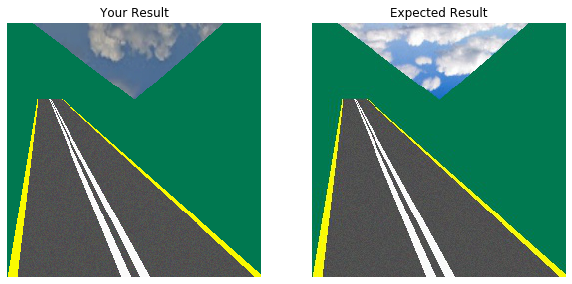

In [10]:
# Since we use random functions in this step, we will set seed to a constant
# value so that we get deterministic results which we can use to compare.

random.seed(2)
np.random.seed(4)


config_path = os.path.join(sim_test.CONFIG_FOLDER,'test_filter_tilt.json')

params=read_config(config_path)

sim_test.test_filter(params,"tilt")

### Test ShiftRoadFilter class

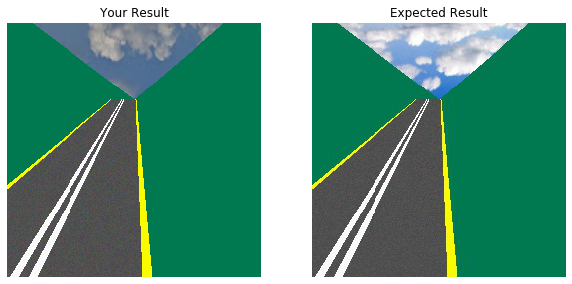

In [11]:
# Since we use random functions in this step, we will set seed to a constant
# value so that we get deterministic results which we can use to compare.

random.seed(2)
np.random.seed(4)


config_path = os.path.join(sim_test.CONFIG_FOLDER,'test_filter_shift.json')

params=read_config(config_path)

sim_test.test_filter(params,"shift")

### Test LaneWidthFilter class

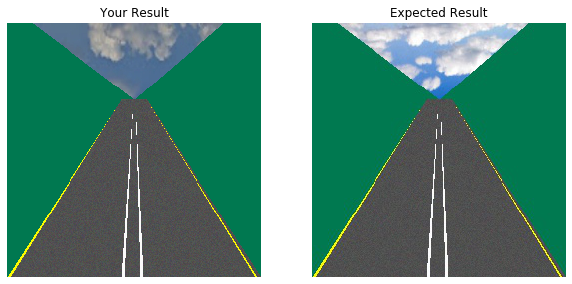

In [12]:
# Since we use random functions in this step, we will set seed to a constant
# value so that we get deterministic results which we can use to compare.

random.seed(2)
np.random.seed(4)


config_path = os.path.join(sim_test.CONFIG_FOLDER,'test_filter_width.json')

params=read_config(config_path)

sim_test.test_filter(params,"width")

### Complete simulator run

In [13]:
random.seed(2)
np.random.seed(4)


config_path = os.path.join(PROJECT_PATH,'sim_config.json')

params=read_config(config_path)

img1, labels = simulate_road_img(params["simulator"])

In [14]:
# TO DO
## Step 13A

# labels  (from previous cell) is numpy array that consists of row(r) and column(c) indices 
# where lanes is present in the img1 array.

# Create a binary image such that at these pixel positions (r,c) the value is 1 and the value is 0 elsewhere.

# Hint: begin with a 2d numpy array whose all elements are 0 and has height and width same as 'img1' array

# labelled_array = ...
labelled_array = np.zeros(img1.shape[:2])
x, y =labels
for i in range (x.size):
    labelled_array[x[i]][y[i]] = 1




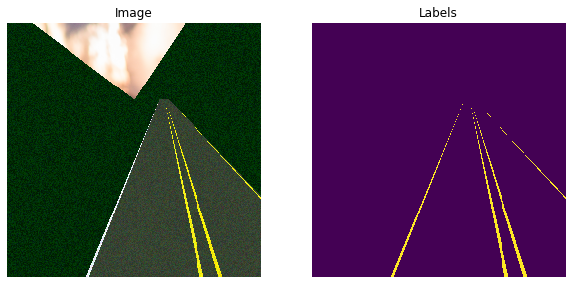

In [15]:
# TO DO
## Step 13B

# Plot 'labelled_array' and 'img1' using matplotlib
# Hint: use subplot and set figure size (10,5).
# Set the axis to 'off' in each subplot.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.imshow(img1)
ax1.title.set_text('Image')
ax2.imshow(labelled_array)
ax2.title.set_text('Labels')
[i.axis('off') for i in [ax1, ax2]]
plt.show()
